# **IPL Prediction using Machine Learning**
***Using IPL Datasets from 2008-2019***

**`Dataset from Kaggle`**

# **Import library and data**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
matches = pd.read_csv('/content/drive/My Drive/Colab Notebooks/intern project/matches.csv')
deliveries = pd.read_csv('/content/drive/My Drive/Colab Notebooks/intern project/deliveries.csv')

In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

# **Data Preprocessing** 

***find the matches where results are NaN and make it draw***

In [ ]:
matches[pd.isnull(matches['winner'])]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,IPL-2011,Delhi,21-05-2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,IPL-2015,Bangalore,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,IPL-2015,Bangalore,17-05-2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,IPL-2019,Bengaluru,30-04-2019,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [ ]:
matches['winner'].fillna('Draw',inplace=True)

In [ ]:
matches.loc[545,'winner']

'Draw'

In [ ]:
# Initials of Teams are replaced in place of Team names(i,e Royal Challengers Bangalore ---> RCB) 

matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant','Delhi Capitals']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS','DD'],inplace=True)

#(Replace Delhi Capitals to Delhi Daredevils as Deccan Chargers having initials DC)

deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant','Delhi Capitals']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS','DD'],inplace=True)

In [ ]:
matches.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
deliveries.head(13)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,SRH,RCB,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,SRH,RCB,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,SRH,RCB,2,1,S Dhawan,DA Warner,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,SRH,RCB,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,SRH,RCB,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN


# **Players Stats**

***Most Runs By a Batsman from 2008-2019***

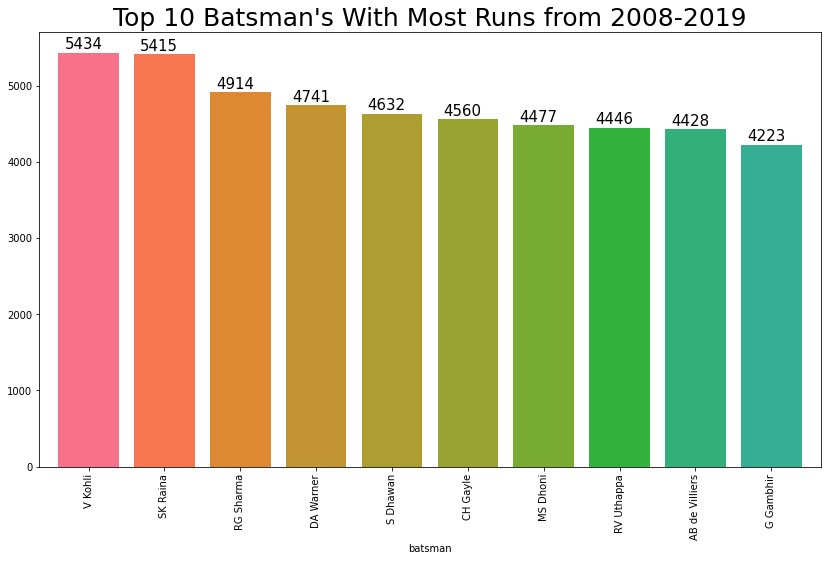

In [ ]:
plt.subplots(figsize=(14,8))
b = deliveries.groupby(['batsman'])['batsman_runs'].sum()#.sort_values('batsman_runs')
b = b.sort_values(ascending=False)
b[100:200]

playerstat=b.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('husl',20))
for p in playerstat.patches:
    playerstat.annotate(format(p.get_height()), (p.get_x()+0.08, p.get_height()+50),fontsize=15)
plt.title("Top 10 Batsman's With Most Runs from 2008-2019",fontsize=25)
plt.show()

***Highest score from a player in individual matches from 2008-2019***

In [ ]:
top_scorers = deliveries.groupby(["match_id", "batsman","batting_team","bowling_team"])["batsman_runs"].sum().reset_index()
top_scorers.sort_values('batsman_runs', ascending=0).head(10)
top_scorers.nlargest(10,'batsman_runs')

,match_id,batsman,batting_team,bowling_team,batsman_runs
6200,411,CH Gayle,RCB,PW,175
900,60,BB McCullum,KKR,RCB,158
8426,562,AB de Villiers,RCB,MI,133
10149,7935,RR Pant,DD,SRH,130
9257,620,AB de Villiers,RCB,GL,129
5585,372,CH Gayle,RCB,DD,128
3135,206,M Vijay,CSK,RR,127
529,36,DA Warner,SRH,KKR,126
7752,516,V Sehwag,KXIP,CSK,122
10417,7953,SR Watson,CSK,SRH,121


***Most numbers of, Man of the Match***

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


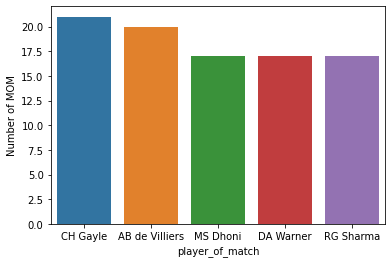

In [ ]:
p_of_m=matches.groupby('player_of_match')['player_of_match'].count()
A=pd.DataFrame(p_of_m)
A.rename(columns={'player_of_match':'Number of MOM'},inplace=True)
A.sort_values("Number of MOM",inplace=True,ascending=False)
A=A.reset_index()
A=A.iloc[:5,:]
sns.barplot(A['player_of_match'] ,A['Number of MOM'])


# **Team wise Performance**

***Most win by any team across all seasons***

In [ ]:
groupby_year = matches.groupby('Season')['winner'].value_counts()
groupby_year

Season    winner
IPL-2008  RR        13
          KXIP      10
          CSK        9
          DD         7
          MI         7
                    ..
IPL-2019  KXIP       6
          SRH        6
          RCB        5
          RR         5
          Draw       1
Name: winner, Length: 103, dtype: int64

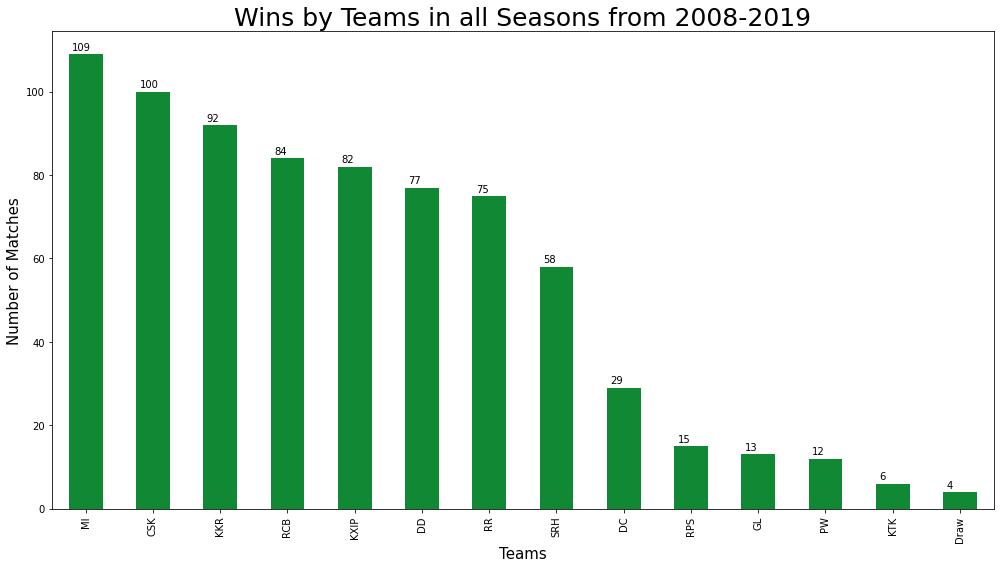

In [ ]:
plt.figure(figsize=(14,8))
mat=matches.winner.value_counts().plot(kind='bar', color='#183')
for p in mat.patches:
    mat.annotate(format(p.get_height()), (p.get_x()+0.05, p.get_height()+1),fontsize=10)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Number of Matches',fontsize=15)
plt.title('Wins by Teams in all Seasons from 2008-2019', size=25)
plt.tight_layout()

***Teams Scored 200+***

In [ ]:
high_scores=deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores=high_scores[high_scores['total_runs']>=200]
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,RCB,PW,263
1370,7937,1,KKR,KXIP,250
1250,620,1,RCB,GL,248
416,206,1,CSK,RR,246
1498,11338,1,KKR,MI,241
122,61,1,CSK,KXIP,240
1134,562,1,RCB,MI,235
1426,11147,1,SRH,RCB,233
596,296,1,KXIP,RCB,232
1500,11339,1,SRH,KXIP,232


***Teams with highest average batting score***


---
---

***`Finding Total matches played by teams`***

---
---



In [ ]:
stat=deliveries.groupby('batting_team')['total_runs'].sum()

print('Total matches played by teams\n')
print('CSK -',len(matches[matches['team1']=='CSK']) + len(matches[matches['team2']=='CSK']))
print('MI -',len(matches[matches['team1']=='MI']) + len(matches[matches['team2']=='MI']))
print('KKR -',len(matches[matches['team1']=='KKR']) + len(matches[matches['team2']=='KKR']))
print('RR -',len(matches[matches['team1']=='RR']) + len(matches[matches['team2']=='RR']))
print('RCB -',len(matches[matches['team1']=='RCB']) + len(matches[matches['team2']=='RCB']))
print('KXIP -',len(matches[matches['team1']=='KXIP']) + len(matches[matches['team2']=='KXIP']))
print('DD -',len(matches[matches['team1']=='DD'])+ len(matches[matches['team2']=='DD']))
print('SRH -',len(matches[matches['team1']=='SRH']) + len(matches[matches['team2']=='SRH']))
print('GL -',len(matches[matches['team1']=='GL'])+ len(matches[matches['team2']=='GL']))
print('RPS -',len(matches[matches['team1']=='RPS'])+ len(matches[matches['team2']=='RPS']))
print('KTK -',len(matches[matches['team1']=='KTK'])+ len(matches[matches['team2']=='KTK']))
print('PW -',len(matches[matches['team1']=='PW'])+ len(matches[matches['team2']=='PW']))
print('DC -',len(matches[matches['team1']=='DC'])+ len(matches[matches['team2']=='DC']))

Total matches played by teams

CSK - 164
MI - 187
KKR - 178
RR - 147
RCB - 180
KXIP - 176
DD - 177
SRH - 108
GL - 30
RPS - 30
KTK - 14
PW - 46
DC - 75


---
---

***`Avg Batting Scores By all teams`***

---
---

In [ ]:
print('BATTING AVERAGE SCORE BY ALL TEAMS\n')
print('Chennai Super Kings average score :',  stat['CSK']/164)
print('Mumbai Indians average score :',  stat['MI']/187)
print('Kolkata Knight Riders score :',  stat['KKR']/178)
print('Rajasthan Royals average score :',  stat['RR']/147)
print('Royal Challangers Banglore average score :',  stat['RCB']/180)
print('King XI Punjab average score :',  stat['KXIP']/176)
print('Delhi Capitals average score :',stat['DD']/177)
print('Sunrisers Hydrabad average score :',  stat['SRH']/108)
print('Gujrat Lions average score :',stat['GL']/30)
print('Raising Pune Supergaints average score :',stat['RPS']/30)
print('Kochi Tuskers Kerala average score :',stat['KTK']/14)
print('Pune Warriors average score :',stat['PW']/46)
print('Deccan Chargers average score :',stat['DC']/75)


BATTING AVERAGE SCORE BY ALL TEAMS

Chennai Super Kings average score : 161.08536585365854
Mumbai Indians average score : 159.40641711229947
Kolkata Knight Riders score : 154.03932584269663
Rajasthan Royals average score : 152.59183673469389
Royal Challangers Banglore average score : 156.25555555555556
King XI Punjab average score : 158.48295454545453
Delhi Capitals average score : 152.64406779661016
Sunrisers Hydrabad average score : 157.9537037037037
Gujrat Lions average score : 162.06666666666666
Raising Pune Supergaints average score : 151.1
Kochi Tuskers Kerala average score : 135.78571428571428
Pune Warriors average score : 138.2173913043478
Deccan Chargers average score : 152.84


# **Clean and Shape Data for prediction**

***Encoding teams for prediction***

---

***Convert all Categorial data to numerical data***


In [ ]:
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)
matches.head(2)          
# Team initials are encoded with Id's with label encoder

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


***Find cities with null values and replace with venue cities***

In [ ]:
matches[pd.isnull(matches['city'])]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,IPL-2014,NaN,19-04-2014,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,IPL-2014,NaN,19-04-2014,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,IPL-2014,NaN,23-04-2014,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,IPL-2014,NaN,25-04-2014,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,IPL-2014,NaN,25-04-2014,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,IPL-2014,NaN,28-04-2014,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,IPL-2014,NaN,30-04-2014,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


***here we got Dubai International Cricket Stadium as venue, so replacing null city to Dubai***

In [ ]:

matches['city'].fillna('Dubai',inplace=True)
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    int64 
 5   team2            756 non-null    int64 
 6   toss_winner      756 non-null    int64 
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    int64 
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
x=matches.groupby(["toss_winner"]).size()
y=matches.groupby(["winner"]).size()
print(x)
print('')
print(y)


toss_winner
1     98
2     92
3     81
4     43
5     89
6     80
7     90
8     15
9     81
10    46
11    13
12     8
13    20
dtype: int64

winner
1     109
2      92
3      84
4      29
5     100
6      75
7      77
8      13
9      82
10     58
11     15
12      6
13     12
14      4
dtype: int64


In [ ]:
dicVal = encode['winner']
print(dicVal['RCB']) #key value of team is printing
print(list(dicVal.keys())[list(dicVal.values()).index(3)]) # Team is displayed based on index value

3
RCB


In [ ]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head(5)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11
2,8,2,Rajkot,field,2,Saurashtra Cricket Association Stadium,2
3,11,9,Indore,field,9,Holkar Cricket Stadium,9
4,3,7,Bangalore,bat,3,M Chinnaswamy Stadium,3


In [ ]:
df = pd.DataFrame(matches)
df.describe()

,team1,team2,toss_winner,winner
count,756.000000,756.000000,756.000000,756.000000
mean,5.498677,5.511905,5.370370,5.318783
std,3.307026,3.274807,3.218386,3.264940
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,2.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,9.000000,8.000000,7.000000,8.000000
max,13.000000,13.000000,13.000000,14.000000


***Finding cities and venues for indexing with encoded data***

In [ ]:
#33 cities
df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

In [ ]:
#41 Venues
df["venue"].unique() 

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [ ]:
city_list=df["city"]
encoded_data, mapping_index = pd.Series(city_list).factorize()
print(encoded_data,'\n')
print(mapping_index,'\n')
print(mapping_index.get_loc("Bangalore"))

[ 0  1  2  3  4  0  5  3  1  5  6  4  2  6  7  5  4  7  0  2  0  3  6  5
  1  2  6  5  1  4  6  8  1  2  8  0  5  1  7  6  7  4  0  7  4  8  0  8
  9  5  7  9  6  1  7  5  4  4  0  4  8  7  5  6 10  0 11  0  8  4 11  5
  8  4  6  7  0 10 11  0  8  5 10  4 11  5  7  6 10  4 11  0 10  8  6  5
  8  7  5  7 10  0  6  4  6  5 11  8  7 11  4  6 10  0  5  5  5 12 12 12
 12 13 14 12 14 12 14 14 13 12 14 13 15 14 14 15 15 16 14 13 17 13 17 16
 14 14 15 15 15 16 18 18 13 17 18 15 15 14 14 14 19 13 17 17 19 15 17 14
 14 15 15 15 17 17  5  5  8  6 11 20  4  6  7  4  7 21 20  5 21 11  5  4
  8  5 20  8  4 20  5  7  5 11  7  6  8 11  5  6  7 22 11 10  6  4  8 22
  4  7 10 22  5 11 10 11 23  4  6 23  7  6  5  5  5  5 11  0 24  7  5  6
 10  4  8  5  0 10  5 11  0  5  6 24  7  5  6  8  5  6  7  0 10 11  7  5
 24  7 10  4 24  6 10 11  5  7  0 11  5 24  0  4  6  5  4  8 10  0  8 10
 11  3  4  5 23  3  5 23 11  5  5 23  7  4  6  5  5 11 11 11  6  5 10  4
 25 10  1 25  4  7  5 11  8  6  7  1  6  4  5 10  4

In [ ]:
venue_list=df["venue"]
encoded_data1, mapping_index1 = pd.Series(venue_list).factorize()
print(encoded_data1,'\n')
print(mapping_index1,'\n')
print(mapping_index1.get_loc("M Chinnaswamy Stadium"))

[ 0  1  2  3  4  0  5  3  1  5  6  4  2  6  7  5  4  7  0  2  0  3  6  5
  1  2  6  5  1  4  6  8  1  2  8  0  5  1  7  6  7  4  0  7  4  8  0  8
  9  5  7  9  6  1  7  5  4  4  0  4 10  7  5  6 11  0 12  0 10  4 12 13
 10  4  6  7  0 11 12  0 10 13 11  4 12 13  7  6 11  4 12  0 11 10  6  5
 10  7  5  7 11  0  6  4  6  5 12 10  7 12  4  6 11  0  5  5 13 14 14 14
 14 15 16 14 16 14 16 16 15 14 16 15 17 16 16 17 17 18 16 15 19 15 19 18
 16 16 17 17 17 18 20 20 15 19 20 17 17 16 16 16 21 15 19 19 21 17 19 16
 16 17 17 17 19 19 13 22 10  6 12 23  4  6  7  4  7 24 23 22 24 12 22  4
 10 22 23 10  4 23 13  7 22 12  7  6 10 12 22  6  7 25 12 11  6  4 10 25
  4  7 11 25 22 12 11 12 26  4  6 26  7  6 13 13 13 13 12  0 27  7 13  6
 11  4 10 13  0 11  5 12  0 13  6 27  7  5  6 10  5  6  7  0 11 12  7 13
 27  7 11  4 27  6 11 12  5  7  0 12 13 27  0  4  6  5  4 10 11  0 10 11
 12  3  4  5 26  3 13 26 12 13  5 26  7  4  6  5  5 12 12 12  6  5 11  4
 28 11 29 28  4  7  5 12 10  6  7 29  6  4  5 11  4

***Comparing Toss winners and match winners***

In [ ]:
toss_list=df["toss_decision"]
encoded_data2, mapping_index2 = pd.Series(toss_list).factorize()
#print(encoded_data2)
print(mapping_index2)
print(mapping_index2.get_loc("field"))
print(mapping_index2.get_loc("bat"))

Index(['field', 'bat'], dtype='object')
0
1


In [ ]:
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('\n No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

No of toss winners by each team
MI -> 98
KKR -> 92
DD -> 90
CSK -> 89
KXIP -> 81
RCB -> 81
RR -> 80
SRH -> 46
DC -> 43
PW -> 20
GL -> 15
RPS -> 13
KTK -> 8

 No of match winners by each team
MI -> 109
CSK -> 100
KKR -> 92
RCB -> 84
KXIP -> 82
DD -> 77
RR -> 75
SRH -> 58
DC -> 29
RPS -> 15
GL -> 13
PW -> 12
KTK -> 6
Draw -> 4


Text(0.5, 1.0, 'Match winners')

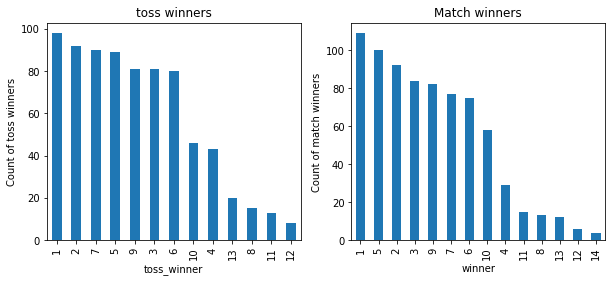

In [ ]:
fig = plt.figure(figsize=(10,4))
toss_winners = fig.add_subplot(121)
toss_winners.set_xlabel('toss_winner',fontsize=10)
toss_winners.set_ylabel('Count of toss winners',fontsize=10)
toss_winners.set_title("toss winners")
temp1.plot(kind='bar')

match_winners = fig.add_subplot(122)
temp2.plot(kind = 'bar')
match_winners.set_xlabel('winner',fontsize=10)
match_winners.set_ylabel('Count of match winners',fontsize=10)
match_winners.set_title("Match winners")

# **Prediction**

***Checking each column for null value***

In [ ]:
df.apply(lambda x: sum(x.isnull()),axis=0) 
# Zero null values now we can move to prediction

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

***Building Predictive Model and converting Categorial Data to Numeric***

In [ ]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df
# All catagorial data is converted into numeric data

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,28,10
1,1,11,27,1,11,21,11
2,8,2,29,1,2,31,2
3,11,9,16,1,9,13,9
4,3,7,2,0,3,17,3
...,...,...,...,...,...,...,...
751,2,1,24,1,1,40,1
752,5,1,8,0,5,18,1
753,10,7,32,1,7,0,7
754,7,5,32,1,5,0,5


***Importing Models from Scikit Learn***

> Models used 


1.   Logistic Regression
2.   Naive bayes classifier
3.   KNN algorithm
4.   Support Vector machine
5.   Decision tree algorithm
6.   Random forest classifier





In [ ]:
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn import metrics

from sklearn.linear_model import LogisticRegression  #For Logistic Regression
from sklearn.naive_bayes import GaussianNB           #For Navie Bayes classifier
from sklearn.neighbors import KNeighborsClassifier   #For KNN Algorithm
from sklearn import svm                              #For Support Vector Machine
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree                             #For Decision tree algorithm  
from sklearn.ensemble import RandomForestClassifier  #For Random Forest Classifier


** ***`Creating Generic function for making classification model to get performance of each models`*** **

In [ ]:
def classification_model(model, data, predictors, outcome):
      model.fit(data[predictors],data[outcome])
      predictions = model.predict(data[predictors])
      print(predictions)
      accuracy = metrics.accuracy_score(predictions,data[outcome])
      print('\nPrediction Accuracy : %s' % '{0:.3%}'.format(accuracy))
      print()

**`1. LOGISTIC REGRESSION`**

In [ ]:
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model =LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)
# Prediction Accuracy : 31.217%

[ 9  1  1  9  5  9  1  5  9  1  2  3  9  2 10  1  9  5  9  1 10  2  2  1
  9  9  2  1  2  3  2  9  2  1  9  9  1  9  9  7  9  9  9  3  3  9  5  9
  9  1 10  9  2  9  5  1  9  3  5  3  6  5  1  2  6  5  3  3  3  3  5  2
 10  5  1  2  6  1  5  1  6  2  6  3  3  2  9  2  1  3  9  1  6  5  5  1
  9  3  1 10  1  1  2  3  2  1  5  3  3  5  3  2  1  5  6  6  2  3  5  9
  5  1  2  5  5  3  5  1  1  6  3  1  6  1  5  6  6  2  5  1  3  5  1  5
  9  5  6  6  6  5  2  5  1  1  5  1  6  3  5  5  9  1  1  9  6  6  5  2
  5  3  6  6  1  1  2  2  9  2  5  9  5  2  3  3  5  3  6  2  5  9  2  3
  9  2  6  5  3  6  2  5  2  5  5  2  6  5  2  5  5  6  5  6  5  3  5  1
  3 10  1  1  2  5  6  5  9  3  2  9  5  1  2  2  2  2  5  3  5  5 10  2
  6  3  9 10  1  1  6  5  6  9  2  9  5  6  2  9  1  2  9  1  9  9  2 10
  9  3  1  9 10  2  9  5  1  9  1  5  7  9  3  3  2  1  5 10  6 10  3  1
  5  9  3  1  9  9  7  5 10  2  1  3 10  3  2  1  1  1  5  3  2  9  9  3
  2  1 10  2  3  3  1  5  9  2  5 10  2  5  1  6  5

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**`2. NAVIE BAYES CLASSIFIER`**

In [ ]:
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
model = GaussianNB() 
classification_model(model, df,predictor_var,outcome_var)
# Prediction Accuracy : 19.312%

[12 12 12 12  5 12  1  5 12 12 12  3 12 12  7 12  3  5 12 12 10 12 12 12
 12 12 12 12 12  8 12 12 12  1 12 12  1 12 12 12 12  3 12 12  3 12  1 12
 12 12  7 12 12 12  5 12  3  3  1  3  5  5  1  2  6  5 12 12 12  3  5 12
  5  5  2 12 12  5  5  5  6 12  6  3 12 12 12  2 12  3 12  1 12  5  2 12
 12 12  1  7 12 12  2  3 12 12  5 12 12  5  3  2 12  5 12  6 12  3  5  9
  3  1 12  5  5  3  5  2  1  6 12  1  6  2  2  6  6  2  5  1 12  1  1  5
 12  5  1  6  6  2 12  5  1 12  5  1  6 12  5  5  9  1 12 12  6  5  5 12
  5  6  1  6 12 12 12  2 12 12  5  6  3  2 12  3  5 12  5  2  5 12  2  3
 12 12  5  5  3  6 12  5 12  5  5  2  6  5  2  2  5  6  5  6  2  3  1  1
  3  7 12 12  2  5  6  5 12  3  2 12  5  2  2  2  2  2  5 12 10  2 13  2
  6  3 12 13 12 12 12  5 12 12 12 12  5 13 12 12 12 12 12 12 12 12 12 13
 12 12 12 12 10 12 12  5 12 12 12  5 12 12 12  3  2 12  9 10 12 10 12 12
  5 12  3  1 12 12 12  7 10 12  1 12 10  3 12 12  1  3  5 12 12 12 12  3
 12 12 13  2  3 12 12  5 12  2  5 10 12  5 12  5 10

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**`3. KNN ALGORITHM`**

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
classification_model(model, df,predictor_var,outcome_var)
# Prediction Accuracy : 66.005%

[10  3  3  9  3 10  1  9 11  1  2  1  9  2  9  9  3  2 10  3 10  1  8  1
 11  9  2 11  2  3  2 10  2  1  9 10  1 11  7  2  7  9  9  1  2  8 10  9
  7  9 10  7  1 11  4 11  2  1 10  3  5  7  1  2  6  7  5  6  9  6  5  1
  9  3  1  3  9  6  5  4  2  1  6  9  5  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  9  2  1  5  7  6  9  5  9  1  5  3  2  6  7  6  1  6  1  1  9
  4  4  2  4  7  2  3  3  2  7  3  1  5  4  9  5  5  1  3  5  3  2  4  5
  5  3  2  5  5  7  9  4  1  4  4  3  1  3  4  3  9  1  4  3  7  4  3  2
  3  7  3  2  4  4  1  1  9  2  3  6  3  2  1  3  5  4  6  1  4  5  1  3
  9  1  6  1  3  6  1  2  1  5  7  2  2  5  1  2  2  6  1  6  2  3  1  4
  3  9  6  4  1  5  6  5  4  1  2  4  4  2  1  3  2  5  2  6  3  1 13  2
  6  1  9 13  4  2  1  5  9  4  2  4  4  1  2  9  5  2  9  1  6  5  3  2
  4  3  6  3  7  2  6  5  1 10  1  5  1  2  6  9  2  1  3 10  6 10  9  2
  5  9  3  1  9  9  2  5  5  2  1  4  7  3  1  5  1  1  5  5  7 11  6  7
  1  2 13  1  3  7  1  5  9  2  4  4  2  3  1  6  3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


**`4. SUPPORT VECTOR MACHINE`** 

In [ ]:
model = svm.SVC(kernel='rbf', C=1, gamma=1) 
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)
# Prediction Accuracy : 87.698%

[10 11  2  9  3 10  1  9  7  1  2  1  8  2  9  1  3  2 10  3 10  1  8  1
 11  9  3 11  2  3  2 10 11  1  9 10  1 11  7 11  7  9 11  1  2  8 10  9
  7  9  7 10  1 11  3 11  2  1  1  3  5  7  1  2  6  7  5  6  9  6  5  1
  9  5  1  3  9  6  5  3  9  1  6  3  4  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  9  6  1  5  3  6  9  5  9  1  5  3  2  6  5  6  5  6  1  3  7
  4  5  2  4  7  6  9  4  7  9  4  1  6  3  9  7  5  1  9  6  5  9  3  5
  6  7  4  6  5  7  9  5  1  7  4  3  1  7  3  6  9  5  4  9  7  2  3  2
  5  7  3  4  3  4  2  1  7  2  4  7  3  2  1  3  5  4  6  3  4  9  1  3
  6  1  6  2  3  6  1  2  1  5  7  2  3  5  1  9  7  6  5  6  2  3  1  4
  3  9  6  4  1  5  6  5  4  1  2  5  4  1  1  5  3  5  2  6  3  7 13  2
  6  1  9 13  4  2 12  5  9  7  2  5  4  1 12  9  1  3  9  1  6  5  3  5
  4  2  6  3  7  2  6  5  1 12  2  5  1 12  7  3  2  1  3 13  6 13  9  6
  5  9  3  4  9 12  4  9  5  2  6  4 14  3  1  5  1  3  5  5  7 13  6  3
  5  2  9  1  3  7  1  5  9  2  4  5  2  6  1  6  3

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**`5. DECISION TREE ALGORITHM`**

In [ ]:
model = tree.DecisionTreeClassifier(criterion='gini')
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)
# Prediction Accuracy : 87.963%

[10 11  2  9  3 10  1  9  7  1  2  1  8  2  9  1  3  2 10  3 10  1  8  1
 11  9  3 11  2  3  2 10 11  1  9 10  1 11  7 11  7  9 11  1  2  8 10  2
  7  9  7 10  1 11  3 11  2  1  1  3  5  6  1  2  6  7  1  6  9  6  5  1
  9  5  1  3  9  6  5  3  2  1  6  3  4  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  9  3  1  5  3  6  9  5  9  1  5  3  2  6  5  6  5  6  1  3  7
  4  5  2  4  7  6  3  4  7  9  4  1  6  3  9  7  5  1  3  6  5  9  3  5
  6  7  4  6  5  7  9  5  1  7  4  3  1  7  3  6  9  5  4  9  7  2  3  2
  5  7  3  4  3  4  2  1  7  2  4  6  3  2  1  3  5  4  6  3  4  9  1  3
  6  1  6  2  3  6  1  2  1  5  7  2  3  5  1  9  7  6  1  6  2  3  1  4
  3  9  6  4  1  5  3  5  4  1  2  5  4  1  1  5  3  5  2  6  3  1 13  2
  6  1  9 13  4  2 12  5  9  7  2 12  4  1 12  9  1  3  9  1  6  5  3  5
  4  2  6  3  7  2  6  5  1 12  2  5  1 12  7  3  2  1  3 13  5 13  9  3
  5  9  3  4  9 12  4  9  5  2  6  4 14  3  1  5  1  3  5  1  7 13  6  3
  5  2  9  1  3  7  1  5  9  2  4  5  2  6  1  6  3

**`6. RANDOM FOREST CLASSIFIER `**

In [ ]:
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
classification_model(model, df,predictor_var,outcome_var)
# Prediction Accuracy : 87.963%

[10 11  2  9  3 10  1  9  7  1  2  1  8  2  9  1 11  2 10  3 10  1  8  1
 11  9  3 11  2  3  2 10 11  1  9 10  1 11  7 11  7  9 11  1  2  8 10  9
  7  9  7 10  1 11  3 11  2  1  1  3  5  6  1  2  6  7  1  6  9 14  5  1
  9  5  1  3  9  6  7  3  2  1  6  3  4  1  5  2  6  1  5  2  6  9  2  1
  9  7  1  9  3  1  5  7  6  9  5  9  1  5  3  2  6  5  6  5  6  1  3  7
  4  5  2  4  7  6  9  4  7  9  4  1  6  3  9  7  5  1  9  6  5  9  3  5
  6  7  4  6  5  7  9  5  1  7  4  3  1  7  3  6  9  5  4  9  7  2  3  2
  5  7  3  4  3  4  2  1  7  2  4  7  3  2  1  3  5  4  6  3  4  9  1  3
  6  1  6  2  3  6  1  2  1  5  7  2  3  5  1  9  7  6  1  6  2  3  9  4
  3  9  6  4  1  5  6  7  4  1  2  5  4  1  1  5  3  5  2  6  3  7 13  2
  6  1  9 13  4  2 12  5  9  7  2 12  4  1 12  9  1  3  9  1  6  5  3  5
  4  2  6  3  7  2  6  5  1 12  2  5  1 12  7  3  2  1  3 13  6 13  9  3
  7  9  3  4  9 12  4  9  5  2  6  4 14  3  1  5  1  3  5  1  7 13  6  7
  5  2  9  1  3  7  1  5  9  2  4  5  2  6  1  6  3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
# We have got Random Forest Classifier and Decision Tree Algorithm accuray equal hence i prefred to use Random Forest Classifier

Random Forest Classifier having the more accuracy. So predicting the winner based on random forest classifier 

---


**Predicting winner based on 3 factors**

*1.Previous Performances*

*2.Based on Toss*

*3.Based on Venue*

---
---

***1. Based on previous performances of team*** 

---
---

In [ ]:
df.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,15,1,3,28,10
1,1,11,27,1,11,21,11
2,8,2,29,1,2,31,2
3,11,9,16,1,9,13,9
4,3,7,2,0,3,17,3


In [ ]:
test=pd.read_csv("/content/drive/My Drive/Colab Notebooks/intern project/test.csv")
test.head()
# Created a test.csv and encoded the city ,venue ,toss_decision with label indexing

,team1,team2,city,toss_winner,venue,toss_decision,date,winner
0,RCB,DD,4,RCB,4,1,08-04-17,RCB
1,GL,SRH,0,SRH,0,0,09-04-17,SRH
2,KKR,MI,5,MI,5,0,09-04-17,MI
3,RCB,KXIP,3,RCB,3,1,10-04-17,KXIP
4,DD,RPS,1,RPS,1,0,11-04-17,DD


In [ ]:
test = test.drop(["date","winner"], axis=1,inplace=False)
# Remove date and winner to predict the winner 

In [ ]:
test.replace(encode, inplace=True)
test.head(5)

,team1,team2,city,toss_winner,venue,toss_decision
0,3,7,4,3,4,1
1,8,10,0,10,0,0
2,2,1,5,1,5,0
3,3,9,3,3,3,1
4,7,11,1,11,1,0


In [ ]:
out = model.predict(test)

In [ ]:
out

array([ 3, 10,  1,  3, 11])

***Create Predicted_winner variable and append all predicted winners to it***

In [ ]:
predicted_winner=[]
for i in out:
    # print(list(dicVal.keys())[list(dicVal.values()).index(i)])
    predicted_winner.append(list(dicVal.keys())[list(dicVal.values()).index(i)])

***Compare the predicted and actual winner for Accuracy***

In [ ]:
actual_winner=pd.read_csv('/content/drive/My Drive/Colab Notebooks/intern project/test.csv')
count_actual_winner=0
k=0
total=len(actual_winner['winner'])
for i in actual_winner['winner']:
    if i==predicted_winner[k]:
        count_actual_winner=count_actual_winner+1
    k=k+1  
print(count_actual_winner)
print("Accuracy of our prediction of recent IPL is", count_actual_winner/total,',that is',(count_actual_winner/total)*100,'%')

3
Accuracy of our prediction of recent IPL is 0.6 ,that is 60.0 %


In [ ]:
predicted_winner

['RCB', 'SRH', 'MI', 'RCB', 'RPS']

In [ ]:
actual_winner['winner']

0     RCB
1     SRH
2      MI
3    KXIP
4      DD
Name: winner, dtype: object

***Saving Comparision of actual winner vs predicted winner into compare.csv file in the specified path of My Drive***

In [ ]:
# Let's delete the file compare.csv in drive then run this code 

In [ ]:
sub = pd.DataFrame()
sub['team1'] = actual_winner['team1']
sub['team2'] = actual_winner['team2']
sub['venue'] = actual_winner['venue']
sub['toss_winner'] =actual_winner['toss_winner']
sub['city'] = actual_winner['city']
sub['toss_decision'] = actual_winner['toss_decision']
sub['date of match']=actual_winner['date']
sub['actual_winner']=actual_winner["winner"]
sub['Predicted_winner'] = predicted_winner
sub.to_csv('/content/drive/My Drive/Colab Notebooks/intern project/compare.csv',index=False)

In [ ]:
sub.head(10)

,team1,team2,venue,toss_winner,city,toss_decision,date of match,actual_winner,Predicted_winner
0,RCB,DD,4,RCB,4,1,08-04-17,RCB,RCB
1,GL,SRH,0,SRH,0,0,09-04-17,SRH,SRH
2,KKR,MI,5,MI,5,0,09-04-17,MI,MI
3,RCB,KXIP,3,RCB,3,1,10-04-17,KXIP,RCB
4,DD,RPS,1,RPS,1,0,11-04-17,DD,RPS


---
---

***2.Based on Toss***


---
---

**`Winning Probability of RCB when they win/loose Toss`**

---
---





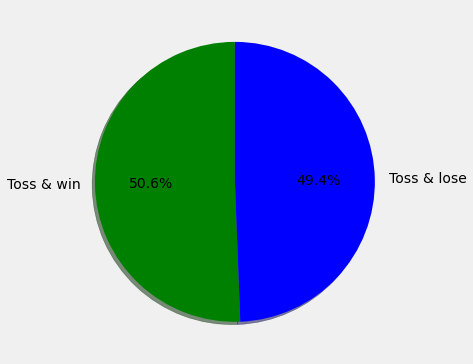

In [ ]:
count =0
for i in range(756): 
    if df["toss_winner"][i]==df["winner"][i]==3 :
        count=count+1

import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
# df_fil=df[df['toss_winner']==df['winner']]
df_fil=df[df['toss_winner']==3]
# slices=[len(df_fil),(756-len(df_fil))]
slices=[count,(len(df_fil)-count)]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','b'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()
# Here Toss & win means winning the toss as well as winning the match
# Here Toss & lose means winning the toss and loosing the match 


---
---

**`Winning Probability of KXIP when they win/loose Toss`**

---
---





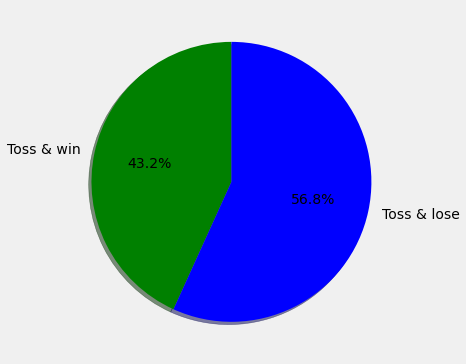

In [ ]:
count =0
for i in range(756): 
    if df["toss_winner"][i]==df["winner"][i]==9 :
        count=count+1

import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
# df_fil=df[df['toss_winner']==df['winner']]
df_fil=df[df['toss_winner']==9]
# slices=[len(df_fil),(756-len(df_fil))]
slices=[count,(len(df_fil)-count)]
mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','b'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()

---
---
***`Winning Probability of all Teams when they win/loose Toss`***

---
---

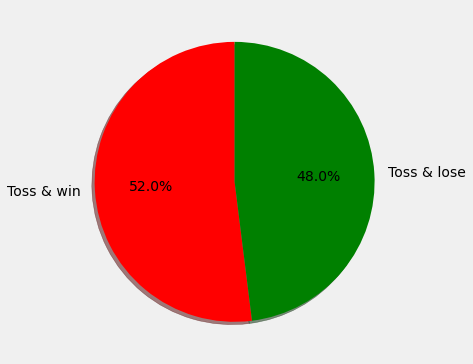

In [ ]:
import matplotlib.pyplot as mlt
mlt.style.use('fivethirtyeight')
df_fil=df[df['toss_winner']==df['winner']]

slices=[len(df_fil),(756-len(df_fil))]

mlt.pie(slices,labels=['Toss & win','Toss & lose'],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['r','g'])
fig = mlt.gcf()
fig.set_size_inches(6,6)
mlt.show()
# This is the generalized version, that is the probability of any team which win toss and win game or win toss and loose game

---
---

***3.Based on the venue***

---
---

***`Comparing RCB vs KXIP in M Chinnaswamy Stadium`***

---
---

In [ ]:
le.classes_[:] # Accending Orders of stadiums

array(['ACA-VDCA Stadium', 'Barabati Stadium', 'Brabourne Stadium',
       'Buffalo Park', 'De Beers Diamond Oval',
       'Dr DY Patil Sports Academy',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Dubai International Cricket Stadium', 'Eden Gardens',
       'Feroz Shah Kotla', 'Feroz Shah Kotla Ground', 'Green Park',
       'Himachal Pradesh Cricket Association Stadium',
       'Holkar Cricket Stadium', 'IS Bindra Stadium',
       'JSCA International Stadium Complex', 'Kingsmead',
       'M Chinnaswamy Stadium', 'M. A. Chidambaram Stadium',
       'M. Chinnaswamy Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Maharashtra Cricket Association Stadium', 'Nehru Stadium',
       'New Wanderers Stadium', 'Newlands', 'OUTsurance Oval',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Punjab Cricket Association Stadium, Mohali',
       'Rajiv Gandhi International Stadium, Uppal',
       'Rajiv Gandhi Intl. Cricket Stadium',
       'Sardar P

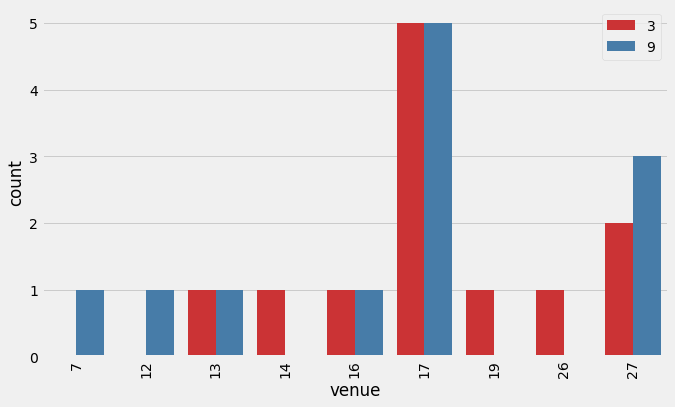

'M. Chinnaswamy Stadium'

In [ ]:
team1=dicVal['RCB']
team2=dicVal['KXIP']
mtemp=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
sns.countplot(x='venue', hue='winner',data=mtemp,palette='Set1')
mlt.xticks(rotation='vertical')
leg = mlt.legend( loc = 'upper right')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()
le.classes_[19]  
# Here 17 & 19 are the index value for M Chinnaswamy Stadium mentioned in Dataset
# other than 17 & 19, In remaining stadium RCB and KXIP were played and their stats were plotted 
# we conclude that KXIP has less winning in M Chinnaswamy Stadium

---
---

***Comparing MI vs RCB in Wankhede Stadium***

---
---




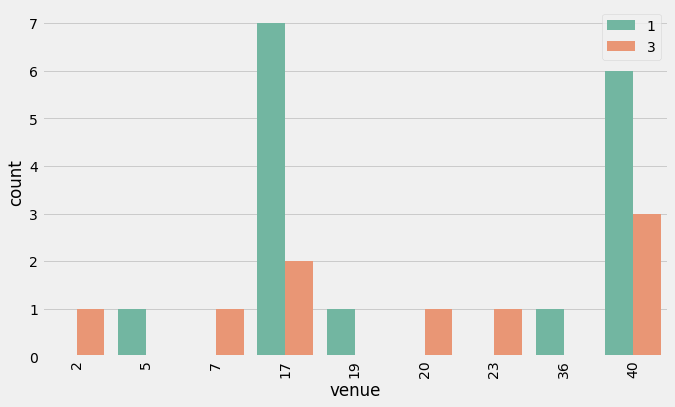

'Wankhede Stadium'

In [ ]:
team1=dicVal['MI']
team2=dicVal['RCB']
mtemp=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
sns.countplot(x='venue', hue='winner',data=mtemp,palette='Set2')
mlt.xticks(rotation='vertical')
leg = mlt.legend( loc = 'upper right')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()
le.classes_[40]
# index 40 for Wankhede stadium
# other than 40, In remaining stadium MI and RCB were played and their stats were plotted 
# we conclude that RCB has less winning in Wankhede Stadium

---
---

***Comparing CSK vs MI in MA Chidambaram Stadium***

---
---




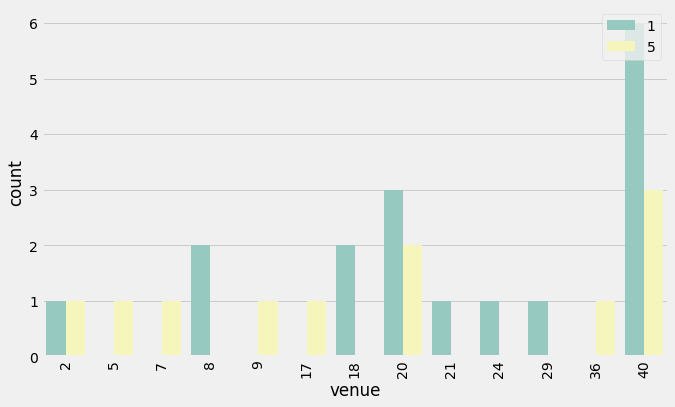

'MA Chidambaram Stadium, Chepauk'

In [ ]:
team1=dicVal['CSK']
team2=dicVal['MI']
mtemp=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
sns.countplot(x='venue', hue='winner',data=mtemp,palette='Set3')
mlt.xticks(rotation='vertical')
leg = mlt.legend( loc = 'upper right')
fig=mlt.gcf()
fig.set_size_inches(10,6)
mlt.show()
le.classes_[20]
# index 20 for MA Chidambaram Stadium
# other than 20, In remaining stadium MI and CSK were played and their stats were plotted 
# we conclude that CSK has less winning in MA Chidambaram Stadium